In [1]:
# Importamos librerias requeridas para el EDA
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [2]:
#Cargamos los datos a nuestro DF
df = pd.read_csv('movies_modificado.csv')

In [26]:
df.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year', 'return',
       'collection_name', 'genres_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_names', 'cast_names',
       'director_name'],
      dtype='object')

# Analisis general de la informacion.

In [3]:
print(df.shape)
df.head()

(45376, 22)


,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,release_year,return,collection_name,genres_names,production_companies_names,production_countries_names,spoken_languages_names,cast_names,director_name
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,5415.0,1995.0,12.451801,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,1995.0,4.043035,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,1995.0,0.000000,Grumpy Old Men Collection,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,34.0,1995.0,5.090760,NaN,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,173.0,1995.0,inf,Father of the Bride Collection,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['English'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      45376 non-null  float64
 1   id                          45376 non-null  int64  
 2   original_language           45365 non-null  object 
 3   overview                    44435 non-null  object 
 4   popularity                  45376 non-null  float64
 5   release_date                45376 non-null  object 
 6   revenue                     45376 non-null  float64
 7   runtime                     45130 non-null  float64
 8   status                      45296 non-null  object 
 9   tagline                     20398 non-null  object 
 10  title                       45376 non-null  object 
 11  vote_average                45376 non-null  float64
 12  vote_count                  45376 non-null  float64
 13  release_year                453

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,45376.0
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,110.096439,1991.881193,inf
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,491.742894,24.055360,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


In [7]:
tipo_texto = df.select_dtypes(include=["object"]).columns
data_texto = df[tipo_texto]
data_texto.describe()

,original_language,overview,release_date,status,tagline,title,collection_name,genres_names,production_companies_names,production_countries_names,spoken_languages_names,cast_names,director_name
count,45365,44435,45376,45296,20398,45376,3165,45376,45376,45376,45376,45376,44502
unique,89,44232,17333,6,20269,42196,1078,4065,22668,2389,1843,42596,17541
top,en,No overview found.,2008-01-01,Released,Based on a true story.,Cinderella,The Bowery Boys,['Drama'],[],['United States of America'],['English'],[],John Ford
freq,32202,133,136,44936,7,11,29,4998,11796,17846,22380,2401,66


In [8]:
df.isnull().sum()

budget                            0
id                                0
original_language                11
overview                        941
popularity                        0
release_date                      0
revenue                           0
runtime                         246
status                           80
tagline                       24978
title                             0
vote_average                      0
vote_count                        0
release_year                      0
return                            0
collection_name               42211
genres_names                      0
production_companies_names        0
production_countries_names        0
spoken_languages_names            0
cast_names                        0
director_name                   874
dtype: int64

# Mapa de calor

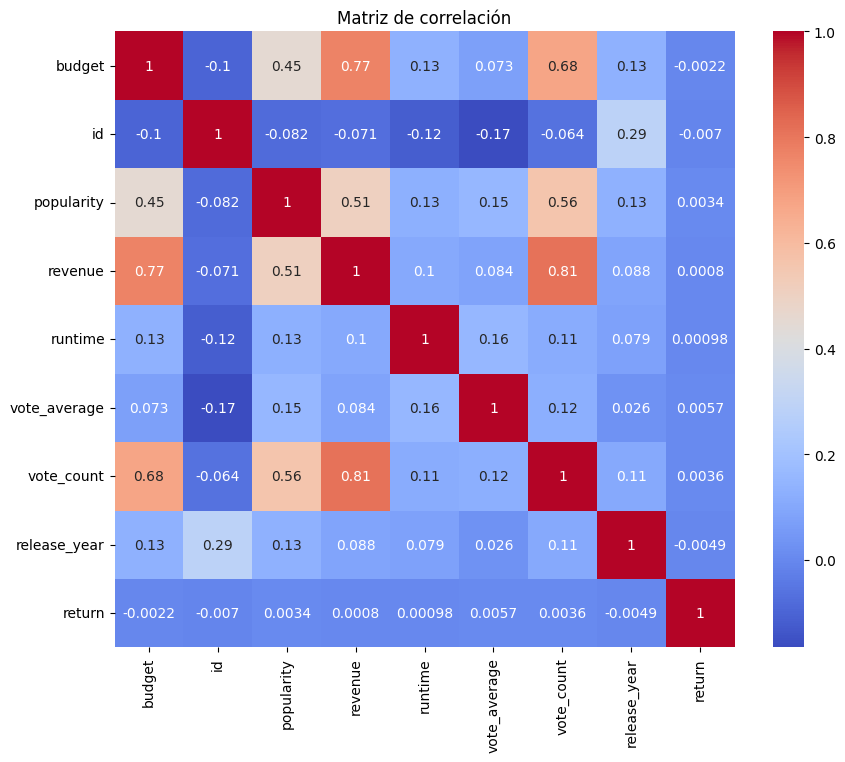

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Gráfico de dispersión

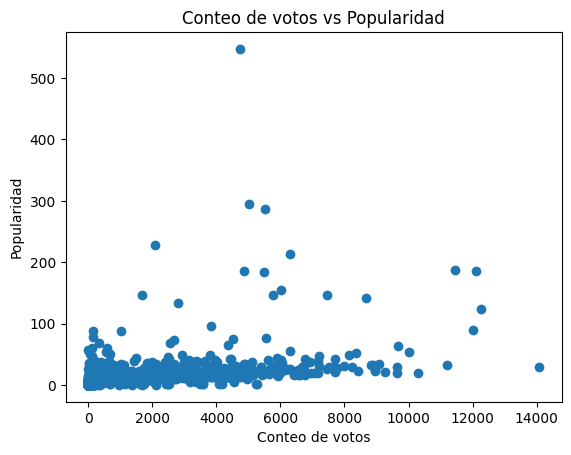

In [10]:
plt.scatter(df['vote_count'], df['popularity'])
plt.xlabel('Conteo de votos')
plt.ylabel('Popularidad')
plt.title('Conteo de votos vs Popularidad')
plt.show()

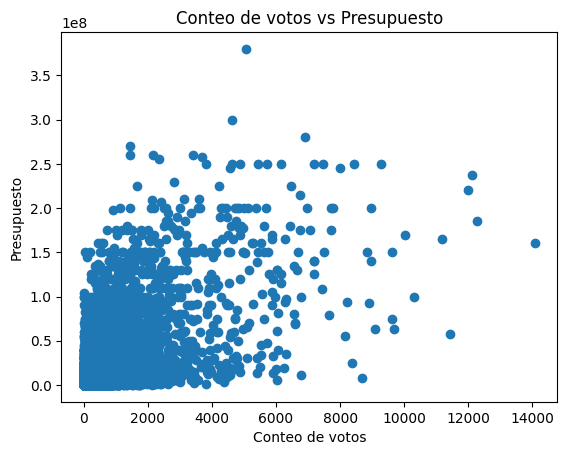

In [11]:
plt.scatter(df['vote_count'], df['budget'])
plt.xlabel('Conteo de votos')
plt.ylabel('Presupuesto')
plt.title('Conteo de votos vs Presupuesto')
plt.show()

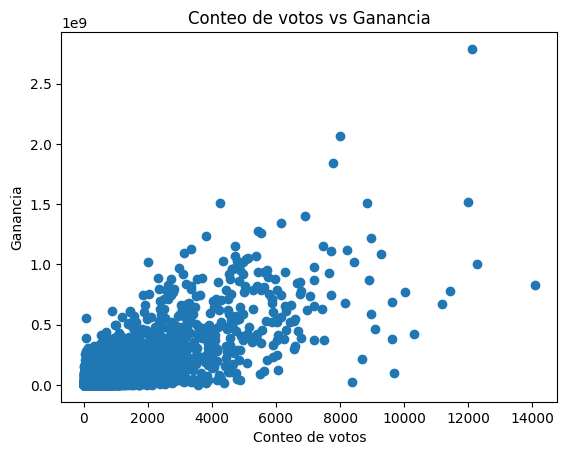

In [12]:
plt.scatter(df['vote_count'], df['revenue'])
plt.xlabel('Conteo de votos')
plt.ylabel('Ganancia')
plt.title('Conteo de votos vs Ganancia')
plt.show()

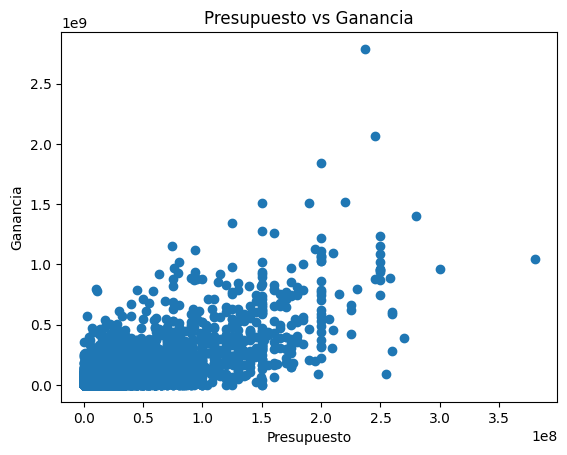

In [13]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Ganancia')
plt.title('Presupuesto vs Ganancia')
plt.show()

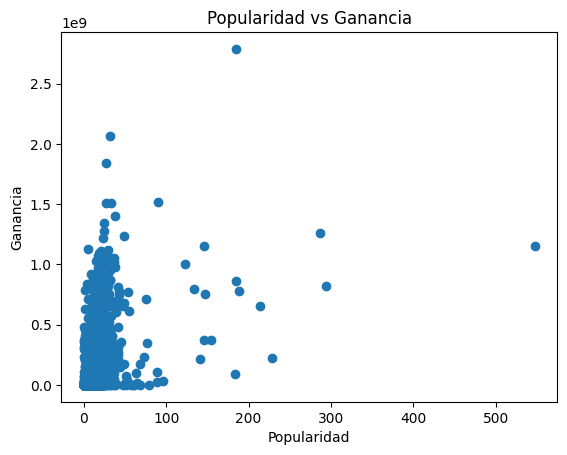

In [14]:
plt.scatter(df['popularity'], df['revenue'])
plt.xlabel('Popularidad')
plt.ylabel('Ganancia')
plt.title('Popularidad vs Ganancia')
plt.show()

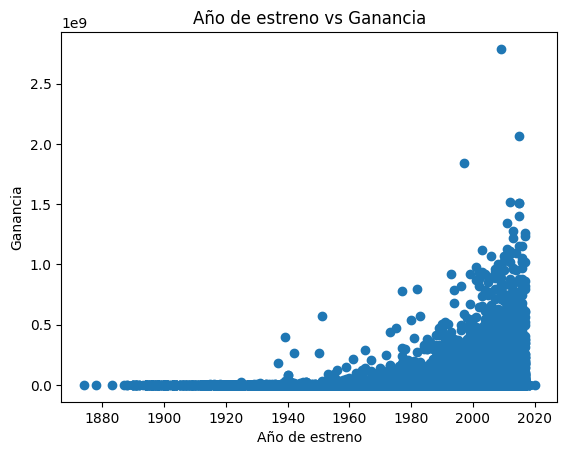

In [15]:
plt.scatter(df['release_year'], df['revenue'])
plt.xlabel('Año de estreno')
plt.ylabel('Ganancia')
plt.title('Año de estreno vs Ganancia')
plt.show()

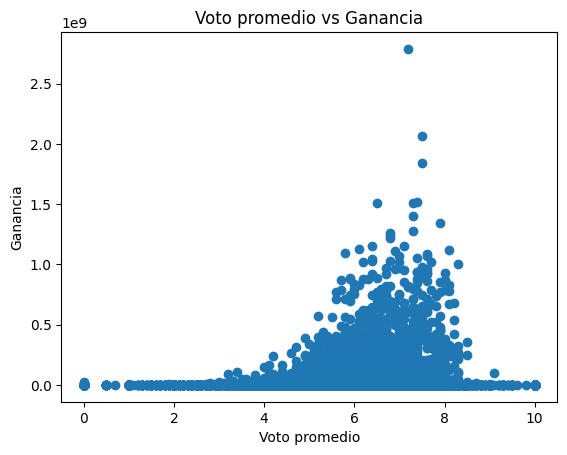

In [16]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Voto promedio')
plt.ylabel('Ganancia')
plt.title('Voto promedio vs Ganancia')
plt.show()

# Grafico de barra

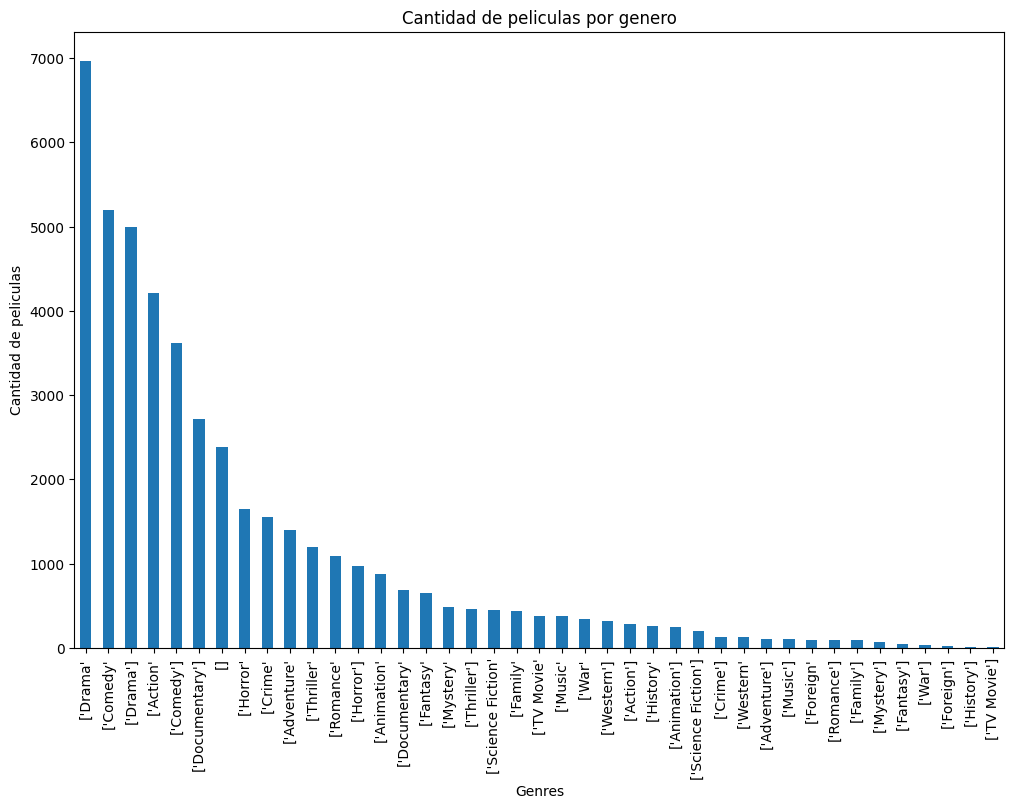

In [22]:
# Filtro del df original los generos unicos para evitar repeticiones y problemas al crear el grafico
df_aux_genere = df.dropna(subset=['genres_names'])
df_aux_genere['genres_names'] = df_aux_genere['genres_names'].str.split(',').str[0].str.strip()
movie_counts = df_aux_genere['genres_names'].value_counts()
# Creacion del grafico
plt.figure(figsize=(12, 8))
movie_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Cantidad de peliculas')
plt.title('Cantidad de peliculas por genero')
plt.xticks(rotation=90)
plt.show()

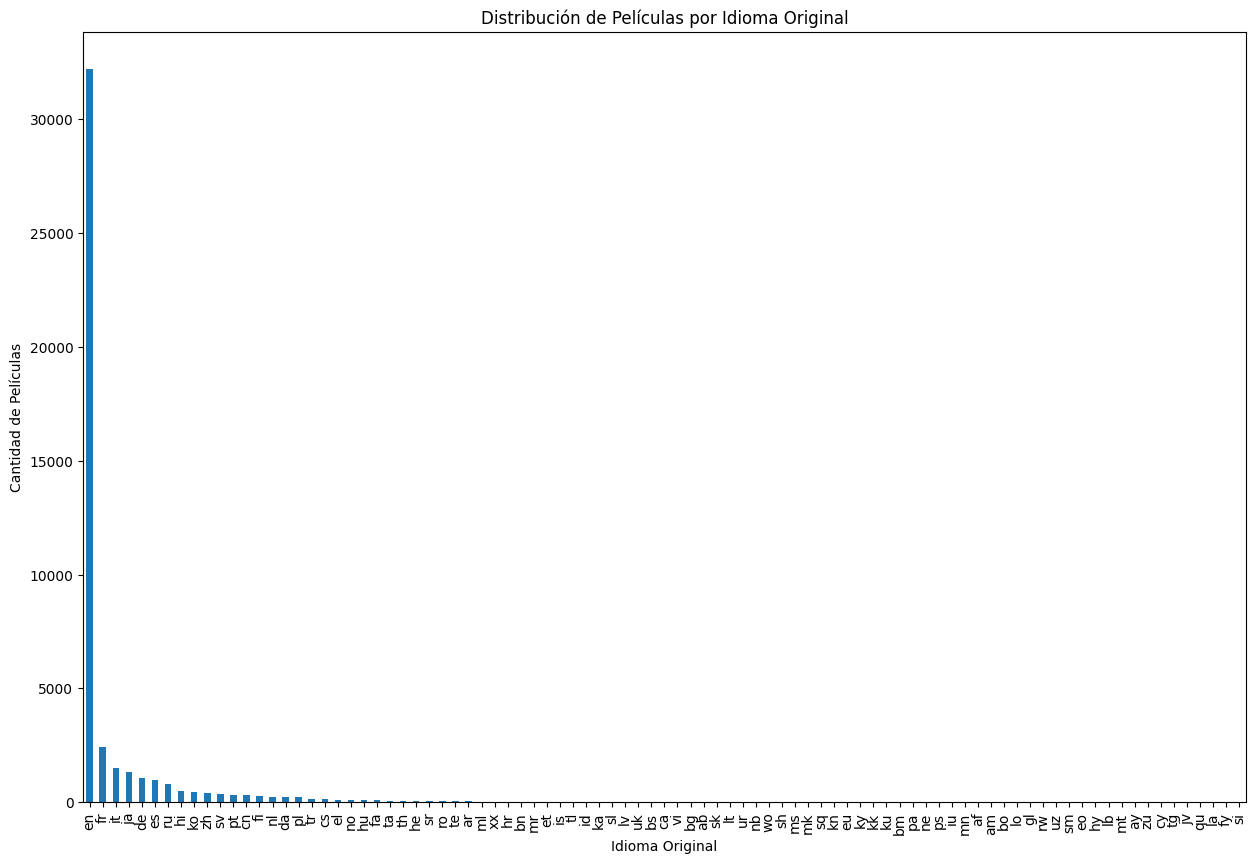

In [44]:
idiomas_originales = df['original_language'].value_counts()

# Graficar el gráfico de barras
plt.figure(figsize=(15, 10))
idiomas_originales.plot(kind='bar')
plt.title("Distribución de Películas por Idioma Original")
plt.xlabel("Idioma Original")
plt.ylabel("Cantidad de Películas")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6364\2418617164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_collection['collection'] = df_aux_collection['collection_name'].str.split(',').str[0].str.strip()


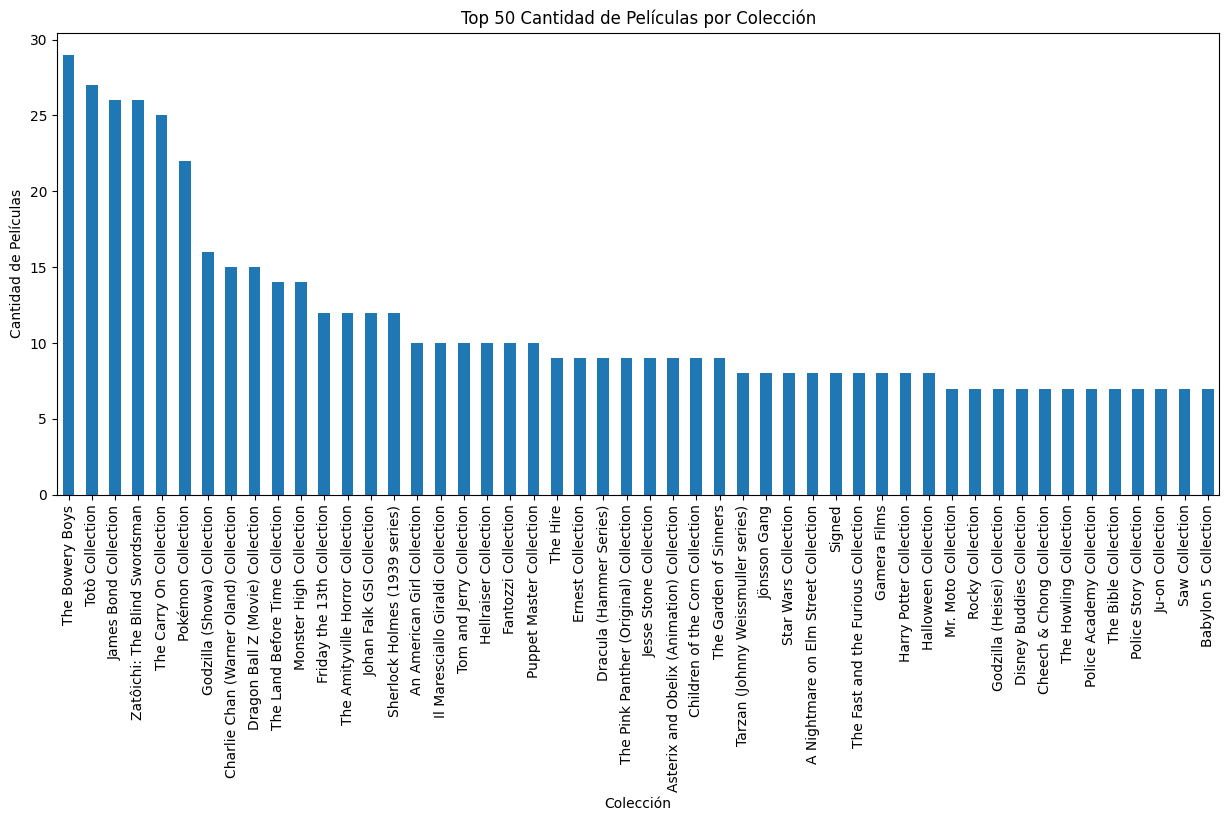

In [28]:
# Filtro del df original las colecciones unicas para evitar repeticiones y problemas al crear el grafico
df_aux_collection = df.dropna(subset=['collection_name'])
df_aux_collection['collection'] = df_aux_collection['collection_name'].str.split(',').str[0].str.strip()
belongs_to_collection_counts = df_aux_collection['collection'].value_counts().head(50)
# Creacion del grafico
plt.figure(figsize=(15, 6))
belongs_to_collection_counts.plot(kind='bar')
plt.xlabel('Colección')
plt.ylabel('Cantidad de Películas')
plt.title('Top 50 Cantidad de Películas por Colección')
plt.show()

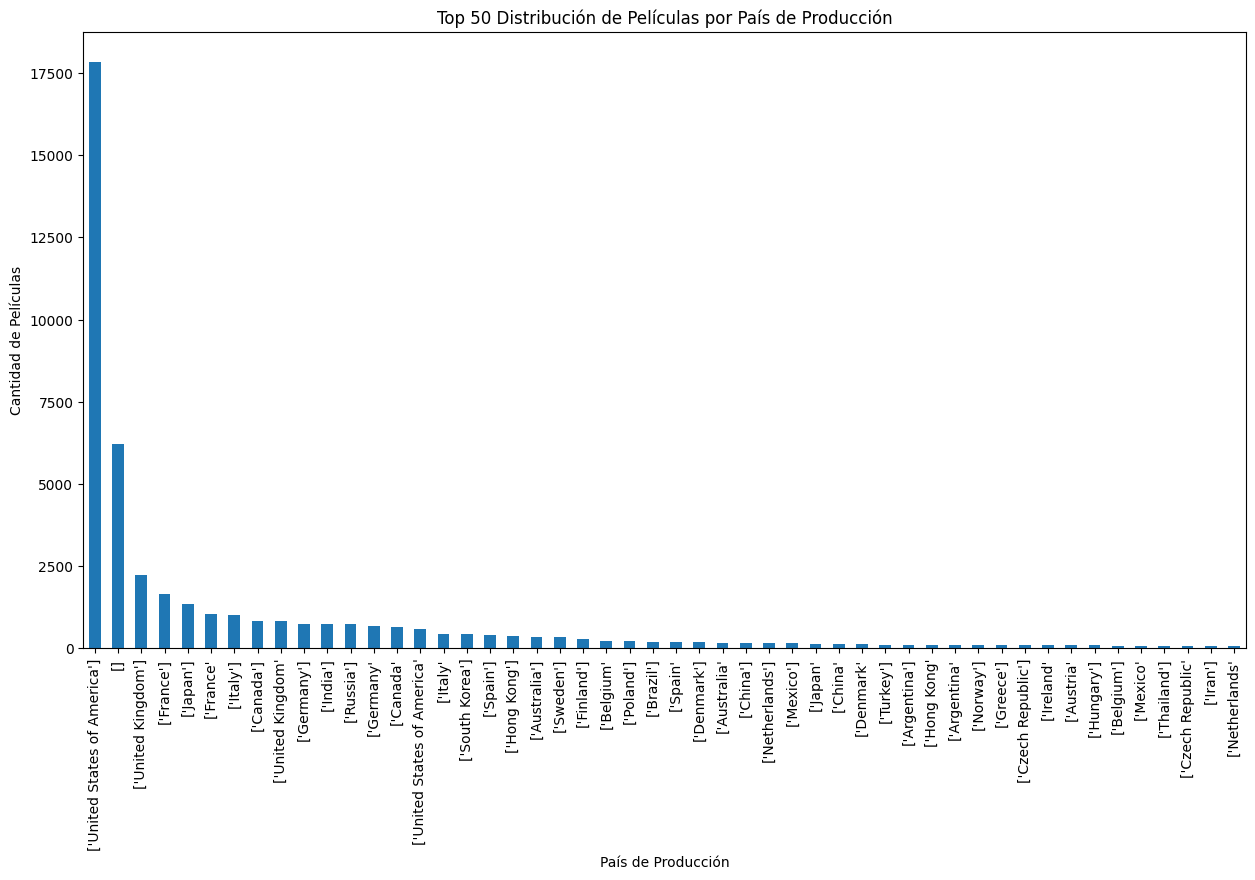

In [33]:
# Filtro del df original las ciudades unicas para evitar repeticiones y problemas al crear el grafico
df_aux_countries = df.dropna(subset=['production_countries_names'])
df_aux_countries['country'] = df_aux_countries['production_countries_names'].str.split(',').str[0].str.strip()
country_counts = df_aux_countries['country'].value_counts().head(50)
# Creacion del grafico
plt.figure(figsize=(15, 8))
country_counts.plot(kind='bar')
plt.xlabel('País de Producción')
plt.ylabel('Cantidad de Películas')
plt.title('Top 50 Distribución de Películas por País de Producción')
plt.xticks(rotation=90)
plt.show()

# Grafico de linea

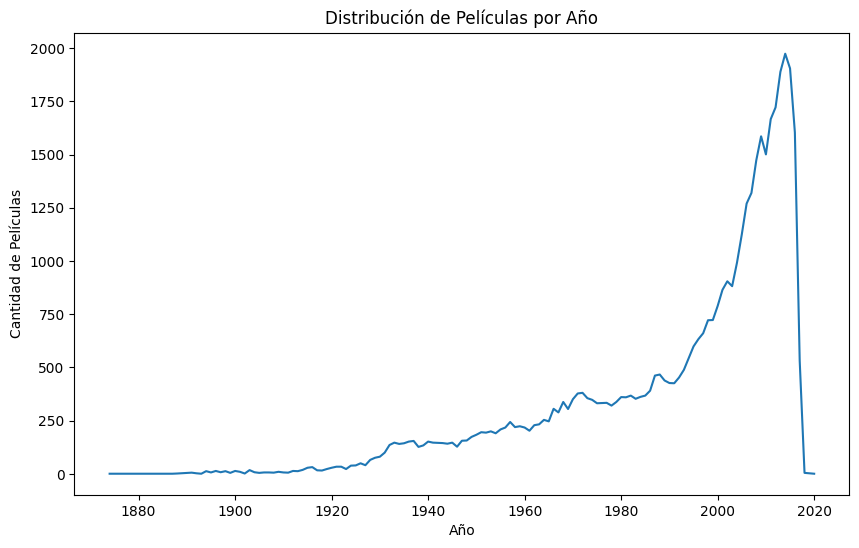

In [35]:
# Contar la cantidad de películas por año
movies_per_year = df['release_year'].value_counts().sort_index()

# Graficar un gráfico de líneas para mostrar la distribución de películas por año
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='line')
plt.title("Distribución de Películas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Películas")
plt.show()

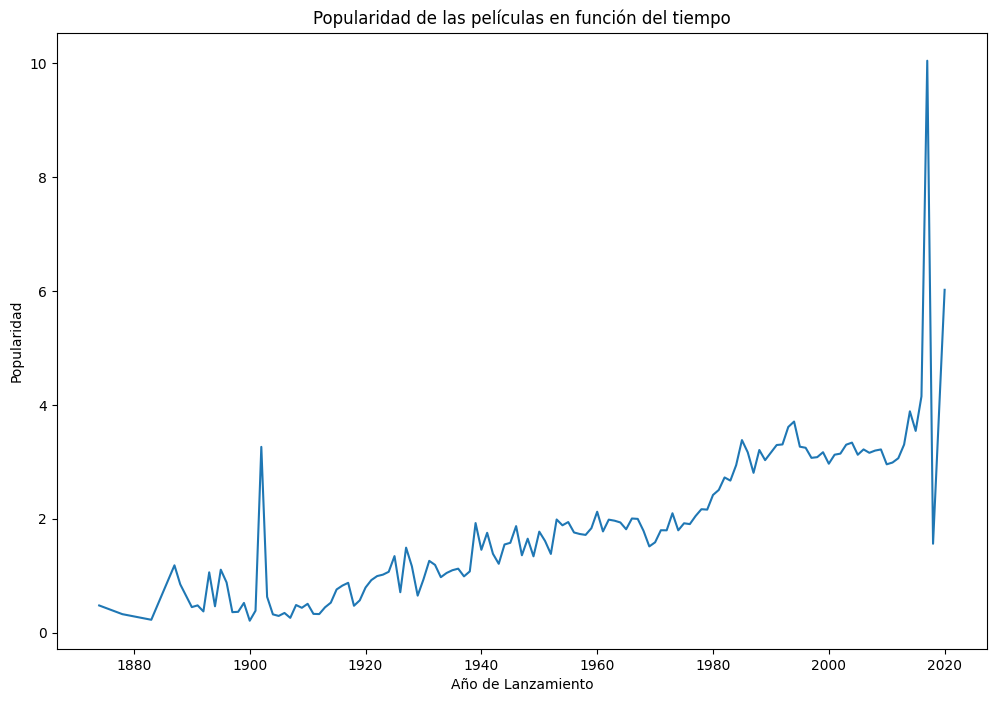

In [36]:
# Creacion del grafico
plt.figure(figsize=(12, 8))
df.groupby('release_year')['popularity'].mean().plot.line()
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Popularidad')
plt.title('Popularidad de las películas en función del tiempo')
plt.show()

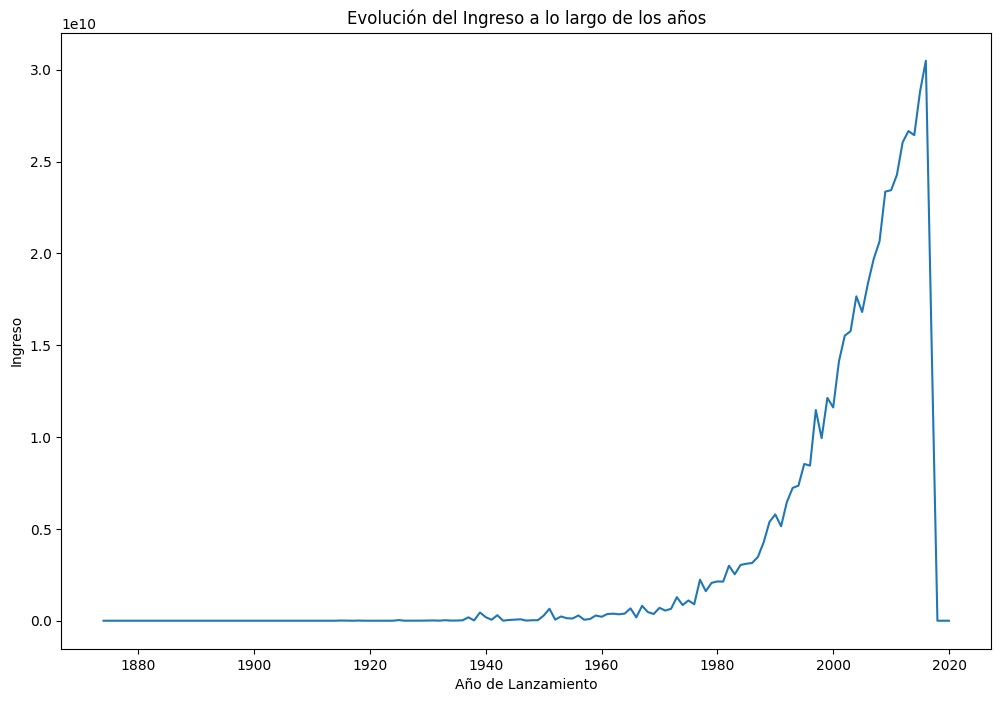

In [37]:
# Creacion del grafico
plt.figure(figsize=(12, 8))
df.groupby('release_year')['revenue'].sum().plot.line()
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ingreso')
plt.title('Evolución del Ingreso a lo largo de los años')
plt.show()

# Nubes de palabras

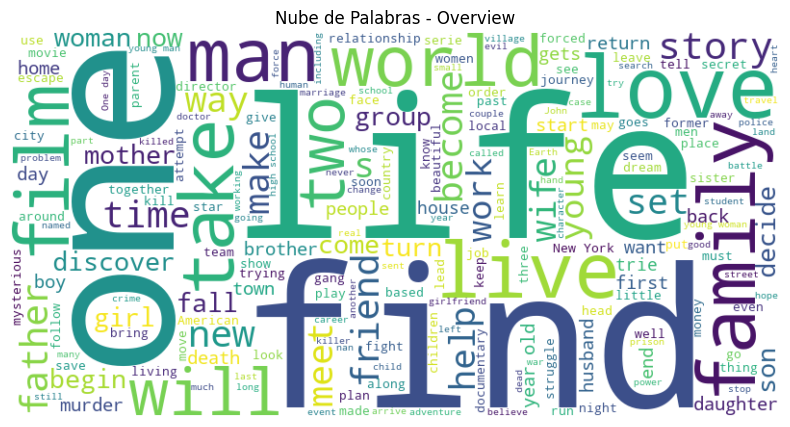

In [38]:
# Nube de palabras basada en la columna 'overview'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['overview'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Overview')
plt.show()

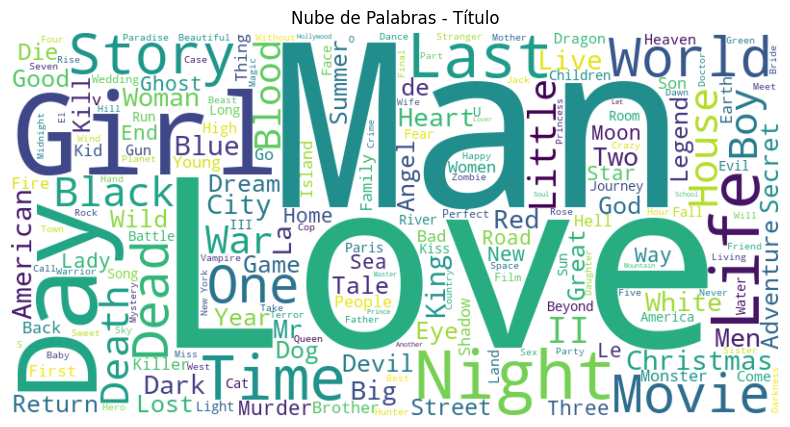

In [39]:
# Nube de palabras basada en la columna 'title'
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Título')
plt.show()

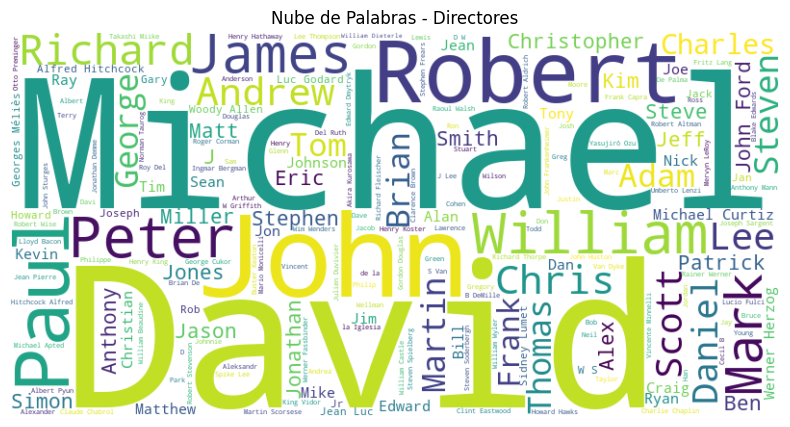

In [41]:
# Prepara la fila "directores" para extraerla a un nuevo df
df['director_name'] = df['director_name'].fillna('')
directors_names = ' '.join(df['director_name'].astype(str))
# Crea y muestra la nube de palabras
directors_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directors_names)
plt.figure(figsize=(10, 5))
plt.imshow(directors_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Directores')
plt.show()

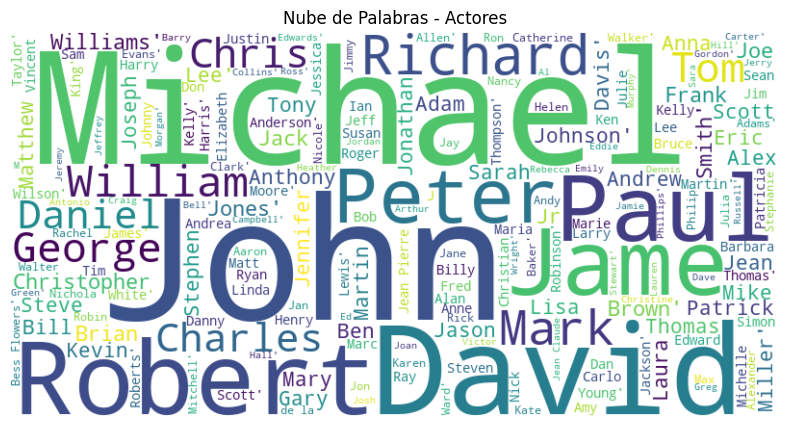

In [43]:
# Prepara la fila "name_cast" para extraerla a un nuevo df
df['cast_names'] = df['cast_names'].fillna('')
cast_names = df['cast_names'].str.cat(sep=', ')
# Crear y muestra la nube de palabras
cast_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cast_names)
plt.figure(figsize=(10, 5))
plt.imshow(cast_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Actores')
plt.show()